### IMPORTING REQUIRED LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # filtering out any warnings for cleaner output

### LOADING THE DATASET

In [2]:
df = pd.read_csv("IPL.csv")

In [3]:
# Creating a deep copy of the original dataframe
original_df = df.copy(deep=True)

### BASIC DATASET CHECKING

In [4]:
df.head() # displaying first five rows of the dataframe

,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal,Playercost
0,M1,MS Dhoni,CSK,MI,RH,Chasing,Sheikh Zayed,WK,0.0,NaN,20,NO,9.5
1,M1,Watson,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,4.0,NaN,17,LBW,9.5
2,M1,Rayudu,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,71.0,NaN,95,CAUGHT,9.0
3,M1,Du Plesis,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,58.0,NaN,100,NO,9.0
4,M1,Vijay,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,1.0,NaN,5,LBW,8.5


In [5]:
df.tail() # displaying last five rows of the dataframe

,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal,Playercost
1315,M16,Coulter Nile,MI,DC,RH,Defending,Dubai,BALL,NaN,2,68,NaN,8.5
1316,M16,J Yadav,MI,DC,RH,Defending,Dubai,ALL,NaN,1,29,NaN,7.5
1317,M16,Boult,MI,DC,LH,Defending,Dubai,BALL,NaN,,79,NaN,9.0
1318,M16,Bumrah,MI,DC,RH,Defending,Dubai,BALL,NaN,0,4,NaN,9.0
1319,M16,Hardik Pandya,MI,DC,RH,Defending,Dubai,ALL,3.0,NaN,15,CAUGHT,8.5


In [6]:
df.shape # Checking the dimensions of the dataframe (rows, columns)

(1320, 13)

In [7]:
df.info() # Viewing a summary of the dataframe's columns, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Individual_Match No  1320 non-null   object 
 1   Player               1320 non-null   object 
 2   Team                 1320 non-null   object 
 3   Opp_Team             1320 non-null   object 
 4   RH/LH                1320 non-null   object 
 5   Match_Type           1320 non-null   object 
 6   Ground               1320 non-null   object 
 7   Role                 1320 non-null   object 
 8   Runs                 876 non-null    float64
 9   Wickets              679 non-null    object 
 10  Dream11_ Points      1320 non-null   int64  
 11  Dismissal            874 non-null    object 
 12  Playercost           1320 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 134.2+ KB


In [8]:
df.describe().transpose() 
# Displaying statistical summary for numerical columns

,count,mean,std,min,25%,50%,75%,max
Runs,876.0,21.130137,22.138813,0.0,4.0,14.0,31.0,132.0
Dream11_ Points,1320.0,35.644697,30.474643,-4.0,11.0,29.0,52.0,180.0
Playercost,1320.0,8.850000,0.770130,7.5,8.0,8.5,9.5,11.0


In [9]:
# Replacing strings with only whitespace characters with NaN
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

In [10]:
df.tail() 
# Displaying the last five rows after the above operation

,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal,Playercost
1315,M16,Coulter Nile,MI,DC,RH,Defending,Dubai,BALL,NaN,2,68,NaN,8.5
1316,M16,J Yadav,MI,DC,RH,Defending,Dubai,ALL,NaN,1,29,NaN,7.5
1317,M16,Boult,MI,DC,LH,Defending,Dubai,BALL,NaN,NaN,79,NaN,9.0
1318,M16,Bumrah,MI,DC,RH,Defending,Dubai,BALL,NaN,0,4,NaN,9.0
1319,M16,Hardik Pandya,MI,DC,RH,Defending,Dubai,ALL,3.0,NaN,15,CAUGHT,8.5


In [11]:
df['Wickets'] = pd.to_numeric(df['Wickets'], errors='coerce') 
# Converting 'Wickets' column to numeric, and setting errors='coerce' to handle any problematic values

In [12]:
df.info() # Checking the dataframe's columns and data types again after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Individual_Match No  1320 non-null   object 
 1   Player               1320 non-null   object 
 2   Team                 1320 non-null   object 
 3   Opp_Team             1320 non-null   object 
 4   RH/LH                1320 non-null   object 
 5   Match_Type           1320 non-null   object 
 6   Ground               1320 non-null   object 
 7   Role                 1320 non-null   object 
 8   Runs                 876 non-null    float64
 9   Wickets              678 non-null    float64
 10  Dream11_ Points      1320 non-null   int64  
 11  Dismissal            873 non-null    object 
 12  Playercost           1320 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 134.2+ KB


In [13]:
df.describe().transpose() # Displaying statistical summary again for verification after conversion

,count,mean,std,min,25%,50%,75%,max
Runs,876.0,21.130137,22.138813,0.0,4.0,14.0,31.0,132.0
Wickets,678.0,0.911504,0.975846,0.0,0.0,1.0,2.0,5.0
Dream11_ Points,1320.0,35.644697,30.474643,-4.0,11.0,29.0,52.0,180.0
Playercost,1320.0,8.850000,0.770130,7.5,8.0,8.5,9.5,11.0


In [14]:
# For categorical columns
print(df.describe(include=['O'])) # Displaying statistical summary for categorical columns

       Individual_Match No  Player  Team Opp_Team RH/LH Match_Type Ground  \
count                 1320    1320  1320     1320  1320       1320   1320   
unique                  17     151     8        8     2          2      3   
top                    M12  Rabada    DC       DC    RH  Defending  Dubai   
freq                    99      17   187      187   893        726    616   

        Role Dismissal  
count   1320       873  
unique     4         7  
top     BALL    CAUGHT  
freq     478       457  


In [15]:
df.isnull().sum() # Checking the number of missing values in each column

Individual_Match No      0
Player                   0
Team                     0
Opp_Team                 0
RH/LH                    0
Match_Type               0
Ground                   0
Role                     0
Runs                   444
Wickets                642
Dream11_ Points          0
Dismissal              447
Playercost               0
dtype: int64

In [16]:
# Creating a directory on Desktop to store all plots
plots_directory = "C:/Users/CHIRAG/Desktop/Plots"
if not os.path.exists(plots_directory):
    os.makedirs(plots_directory)


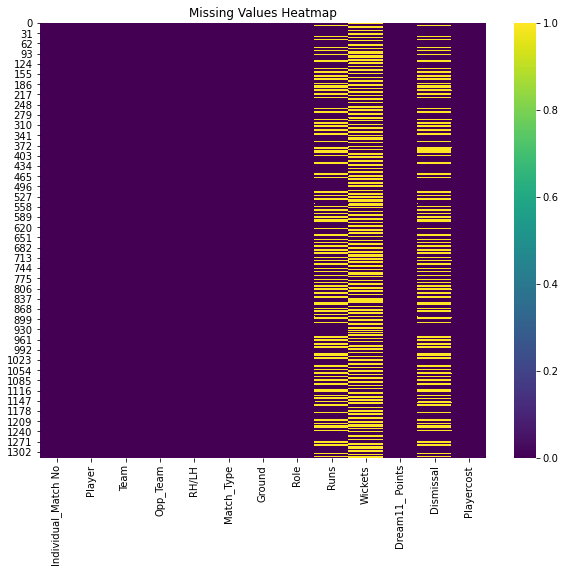

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig(os.path.join(plots_directory, "Missing_Values_Heatmap1.png"))
plt.show()

In [18]:
# Creating columns to indicate if a player has batted or bowled in a match
df['Batted'] = df['Runs'].notna().astype(int)
df['Bowled'] = df['Wickets'].notna().astype(int)

# Handling missing values for players who did not bat
df['Dismissal'].fillna('Did Not Bat', inplace=True)

# Handling cases where players have 'Runs' but no 'Dismissal' information (indicating they were not out)
mask = (df['Runs'] >= 0) & (df['Dismissal'] == 'Did Not Bat')
df.loc[mask, 'Dismissal'] = 'NO'

# Filling missing values in 'Runs' and 'Wickets' with 0
df['Runs'].fillna(0, inplace=True)
df['Wickets'].fillna(0, inplace=True)


In [19]:
df # Displaying the dataframe after the above operations

,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal,Playercost,Batted,Bowled
0,M1,MS Dhoni,CSK,MI,RH,Chasing,Sheikh Zayed,WK,0.0,0.0,20,NO,9.5,1,0
1,M1,Watson,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,4.0,0.0,17,LBW,9.5,1,0
2,M1,Rayudu,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,71.0,0.0,95,CAUGHT,9.0,1,0
3,M1,Du Plesis,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,58.0,0.0,100,NO,9.0,1,0
4,M1,Vijay,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,1.0,0.0,5,LBW,8.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,M16,Coulter Nile,MI,DC,RH,Defending,Dubai,BALL,0.0,2.0,68,Did Not Bat,8.5,0,1
1316,M16,J Yadav,MI,DC,RH,Defending,Dubai,ALL,0.0,1.0,29,Did Not Bat,7.5,0,1
1317,M16,Boult,MI,DC,LH,Defending,Dubai,BALL,0.0,0.0,79,Did Not Bat,9.0,0,0
1318,M16,Bumrah,MI,DC,RH,Defending,Dubai,BALL,0.0,0.0,4,Did Not Bat,9.0,0,1


In [20]:
df.isnull().sum() # Checking missing values again after the handling operations

Individual_Match No    0
Player                 0
Team                   0
Opp_Team               0
RH/LH                  0
Match_Type             0
Ground                 0
Role                   0
Runs                   0
Wickets                0
Dream11_ Points        0
Dismissal              0
Playercost             0
Batted                 0
Bowled                 0
dtype: int64

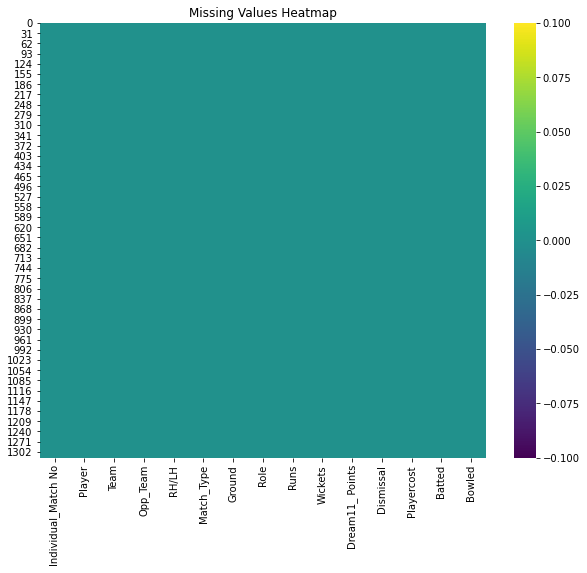

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig(os.path.join(plots_directory, "Missing_Values_Heatmap.png"))
plt.show()


In [22]:
df.duplicated().sum() 
# Checking for duplicated rows in the dataframe

0

### EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

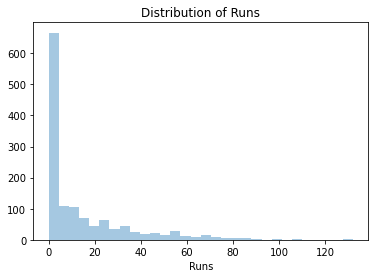

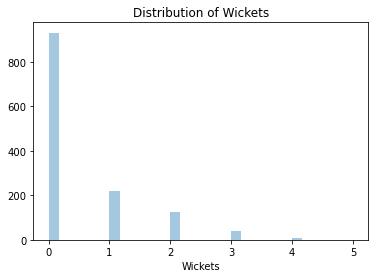

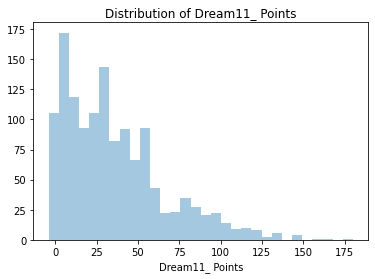

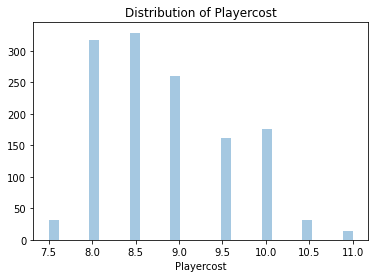

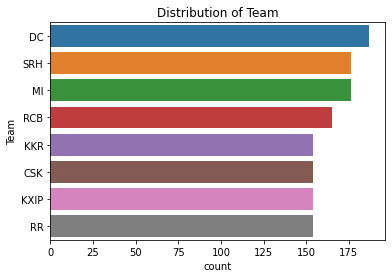

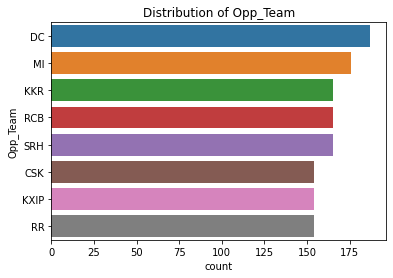

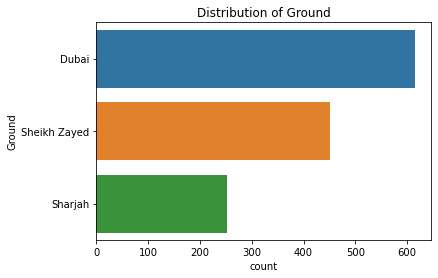

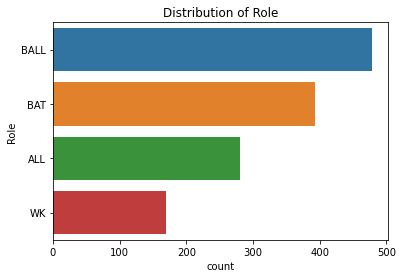

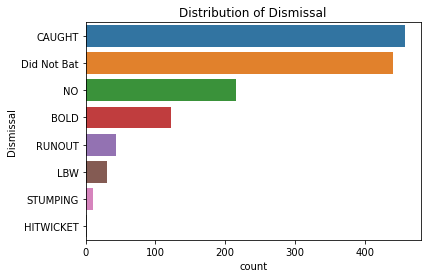

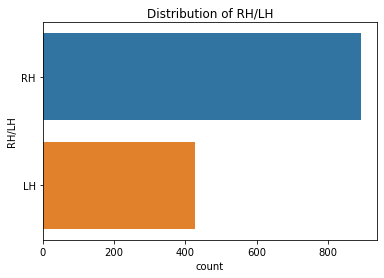

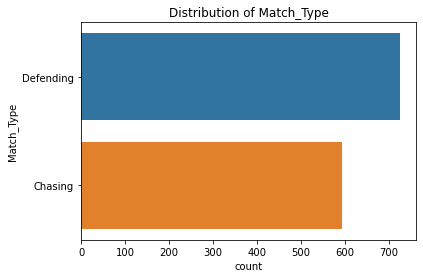

In [23]:
# Distribution plots for continuous features
features_continuous = ['Runs', 'Wickets', 'Dream11_ Points', 'Playercost']

for feature in features_continuous:
    clean_feature_name = feature.replace('/', '_').replace('\\', '_')
    sns.distplot(df[feature].dropna(), bins=30, kde=False)
    plt.title(f'Distribution of {feature}')
    plt.savefig(os.path.join(plots_directory, f"Distribution_{clean_feature_name}.png"))
    plt.show()

# Bar plots for categorical features
features_categorical = ['Team', 'Opp_Team', 'Ground', 'Role', 'Dismissal', 'RH/LH', 'Match_Type']

for feature in features_categorical:
    clean_feature_name = feature.replace('/', '_').replace('\\', '_')
    sns.countplot(y=df[feature], order = df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.savefig(os.path.join(plots_directory, f"Count_{clean_feature_name}.png"))
    plt.show()
    


#### DISTRIBUTION PLOTS FOR CONTINUOUS FEATURES IS DISPLAYED

#### BAR PLOTS FOR CONTINUOUS FEATURES IS DISPLAYED

### BIVARIATE ANALYSIS

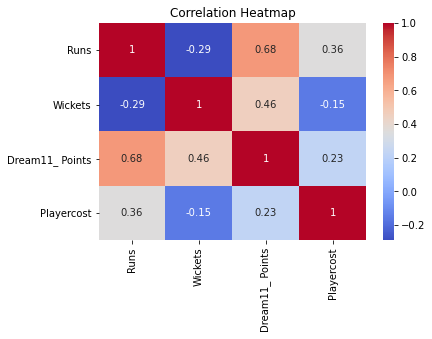

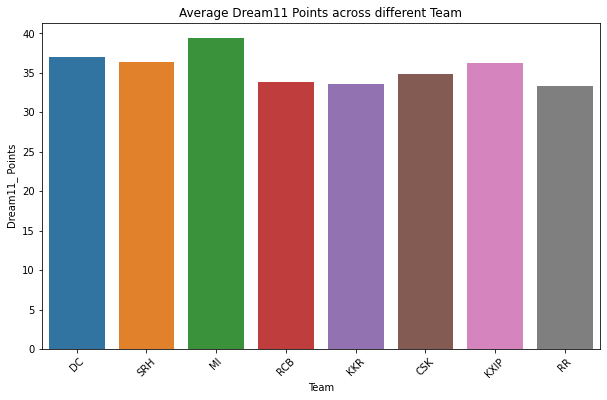

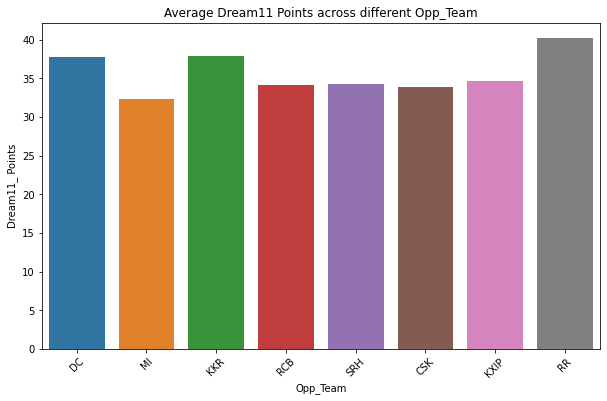

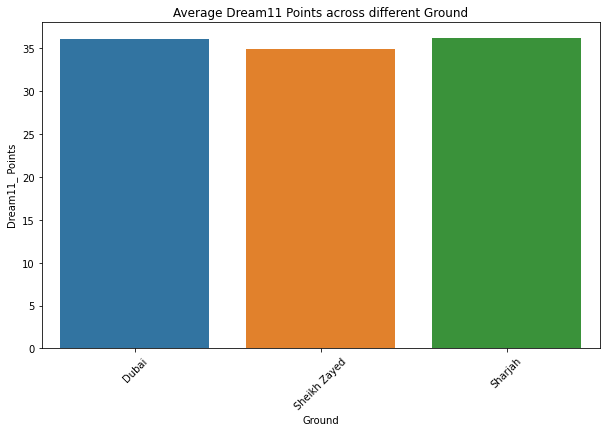

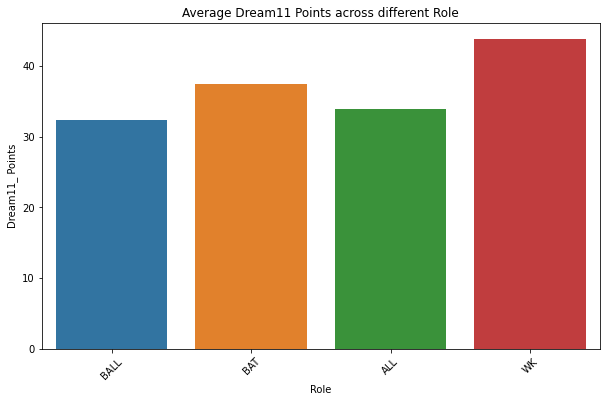

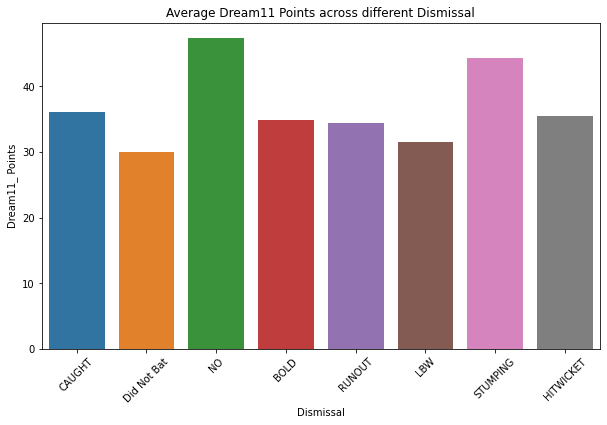

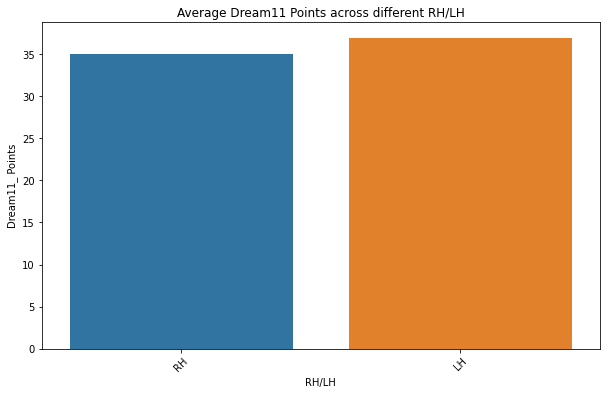

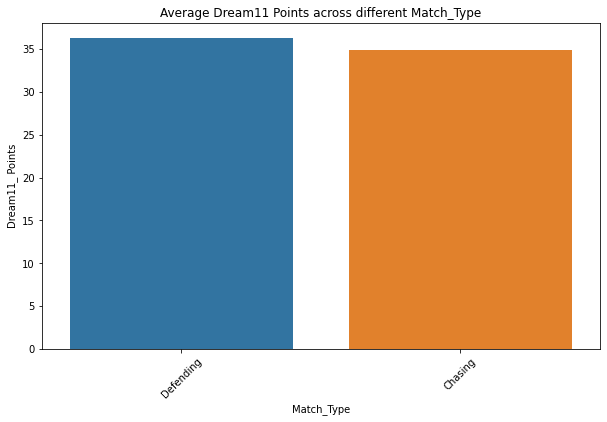

In [24]:
# Correlation heatmap
corr = df[['Runs', 'Wickets', 'Dream11_ Points', 'Playercost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig(os.path.join(plots_directory, "Correlation_Heatmap.png"))
plt.show()

# Bar plots of Dream11 Points vs categorical variables
for feature in features_categorical:
    clean_feature_name = feature.replace('/', '_').replace('\\', '_')
    plt.figure(figsize=(10,6))
    sns.barplot(x=df[feature], y=df['Dream11_ Points'], order=df[feature].value_counts().index, ci=None)
    plt.title(f'Average Dream11 Points across different {feature}')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(plots_directory, f"Barplot_{clean_feature_name}.png"))
    plt.show()


#### CORRELATION HEATMAP

#### AVERAGE DREAM11 POINTS IS PLOTTED AGAINST ALL DIFFERENT FEATURES LIKE TEAM, OPPOSITE TEAM, ROLE, GROUND, RH/LH, MATCH_TYPE, DISMISSAL TYPE

### ANALYSIS BASED ON ROLES AND PLAYERS

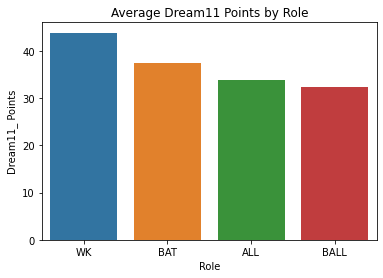

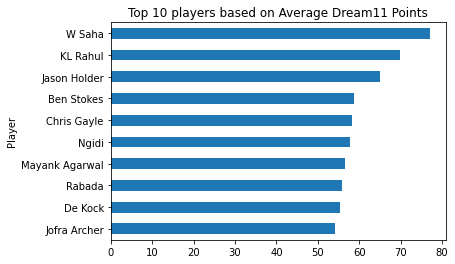

In [25]:
# Average Dream11 Points by Role
sns.barplot(x='Role', y='Dream11_ Points', data=df, estimator=np.mean, ci=None)
plt.title('Average Dream11 Points by Role')
plt.savefig(os.path.join(plots_directory, "Avg_Dream11_Points_by_Role.png"))
plt.show()




# Top 10 players based on Dream11 Points
top_players = df.groupby('Player')['Dream11_ Points'].mean().sort_values(ascending=False).head(10)
top_players.plot(kind='barh')
plt.title('Top 10 players based on Average Dream11 Points')
plt.gca().invert_yaxis()
plt.savefig(os.path.join(plots_directory, "Top10_Players_Avg_Points.png"))
plt.show()


#### Insights into the effectiveness of various roles within the cricket teams are provided by the bar graph. In terms of average Dream11 points, the role of the wicketkeeper (WK) is the highest-scoring, followed by that of the batsman, all-rounder, and bowler.


#### Based on their average Dream11 points, the top cricketers are displayed in the horizontal bar graph.

### ANALYSIS BASED ON TEAMS

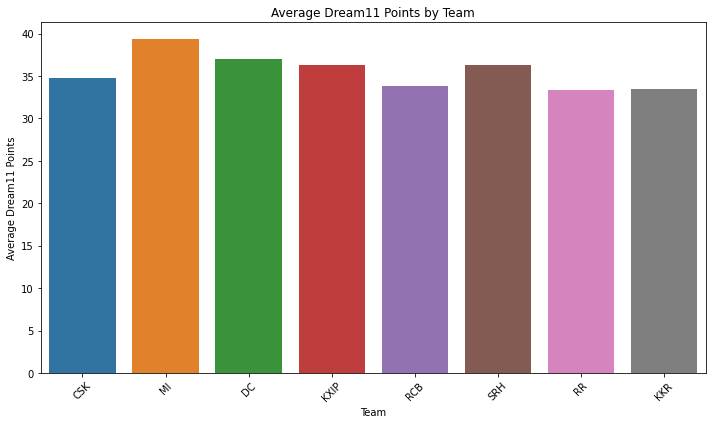

In [26]:
# Average Dream11 Points by Team
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Dream11_ Points', data=df, estimator=np.mean, ci=None)
plt.title('Average Dream11 Points by Team')
plt.xticks(rotation=45)
plt.ylabel('Average Dream11 Points')
plt.xlabel('Team')
plt.tight_layout()
plt.savefig(os.path.join(plots_directory, "Avg_Dream11_Points_by_Team.png"))
plt.show()



#### MI ON THE TOP FOLLOWED BY DC AND SRH. RR IS AT THE LOWEST END OF THE SPECTRUM. KXIP, CSK AND RCB FIND THEMSELVES IN THE MID-TIER RANGE AND KKR IS SECOND LOWEST.

### EXTERNAL FACTORS IMPACT

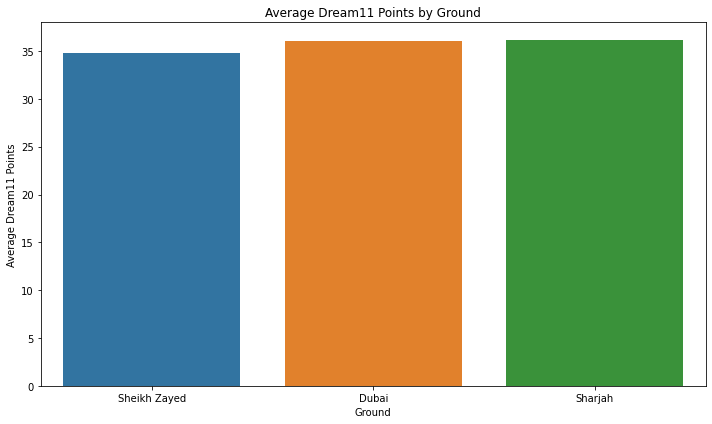

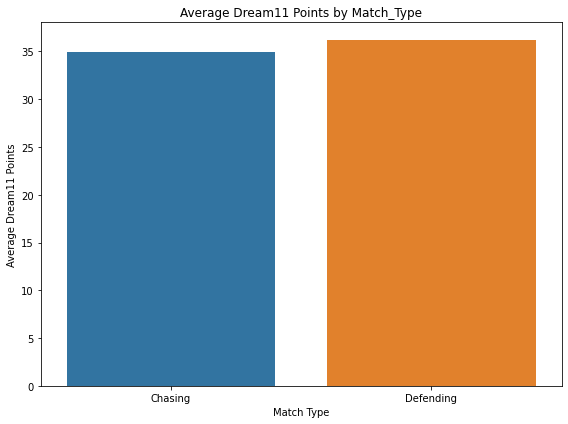

In [27]:
# Influence of Ground on Dream11 Points
plt.figure(figsize=(10, 6))
sns.barplot(x='Ground', y='Dream11_ Points', data=df, ci=None)
plt.title('Average Dream11 Points by Ground')
plt.ylabel('Average Dream11 Points')
plt.xlabel('Ground')
plt.tight_layout()
plt.savefig(os.path.join(plots_directory, "Average_Points_by_Ground.png"))
plt.show()





# Influence of Match Type (Chasing/Defending) on Dream11 Points
plt.figure(figsize=(8, 6))
sns.barplot(x='Match_Type', y='Dream11_ Points', data=df, ci=None)
plt.title('Average Dream11 Points by Match_Type')
plt.ylabel('Average Dream11 Points')
plt.xlabel('Match Type')
plt.tight_layout()
plt.savefig(os.path.join(plots_directory, "Average_Points_by_Match_Type.png"))
plt.show()

#### The bar plot offers a visual comparison of the players' average Dream11 points over three different cricket grounds. Sharjah got the highest average dream11 points scored by players followed by Dubai ground and Sheikh Zayed.The disparities in average dream11 points between the grounds imply that each ground's unique external elements, such as the pitch's characteristics, the size of the boundaries, or even the presence of the crowd, may have an impact on how well players perform. When selecting players depending on the venue, this knowledge might be vital for fans of fantasy sports.

#### The bar plot illustrates how players' average dream11 points fluctuate depending on whether they are defending or chasing, giving viewers an understanding of how different match conditions could affect a player's success in fantasy sports. The average dream11 point was higher for players defending a score than for those chasing. This distinction shows that defending as a tactic can provide players additional chances to show off their abilities and get points. This could be explained by elements like the psychological benefit of having a score on the board or certain game dynamics that are present when defending. For instance, fielders may be in positions that provide more opportunities for catches or run-outs, while bowlers may have greater room to take wickets. Teams chasing a target, on the other hand, could experience more pressure, which could have an effect on their performance and, ultimately, their point totals. Fantasy sports fans need to be aware of these subtleties since the players they choose to play on their squad will often depend on whether they'll be chasing or defending.
 

### DATA PREPROCESSING

In [28]:
## One hot encoding
df = pd.get_dummies(df, columns=['Team', 'Opp_Team', 'Ground', 'Role', 'Dismissal'], drop_first=False) # Converting categorical columns into one-hot encoded columns


In [29]:
## Label Encoding
df['RH/LH'] = df['RH/LH'].map({'RH': 0, 'LH': 1})
# Converting 'RH/LH' column into binary format with 'RH' as 0 and 'LH' as 1
df['Match_Type'] = df['Match_Type'].map({'Defending': 0, 'Chasing': 1}) # Converting 'Match_Type' column into binary format with 'Defending' as 0 and 'Chasing' as 1


In [30]:
from sklearn.preprocessing import StandardScaler # Importing StandardScaler from scikit-learn for feature scaling

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the relevant columns and transforming them
df[['Runs', 'Wickets', 'Playercost']] = scaler.fit_transform(df[['Runs', 'Wickets', 'Playercost']])

# Saving the fitted scaler for potential future use, such as when deploying a model or for scaling new data
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [31]:
df # Displaying the updated dataframe after scaling

,Individual_Match No,Player,RH/LH,Match_Type,Runs,Wickets,Dream11_ Points,Playercost,Batted,Bowled,...,Role_BAT,Role_WK,Dismissal_BOLD,Dismissal_CAUGHT,Dismissal_Did Not Bat,Dismissal_HITWICKET,Dismissal_LBW,Dismissal_NO,Dismissal_RUNOUT,Dismissal_STUMPING
0,M1,MS Dhoni,0,1,-0.680554,-0.561207,20,0.844333,1,0,...,0,1,0,0,0,0,0,1,0,0
1,M1,Watson,0,1,-0.486425,-0.561207,17,0.844333,1,0,...,1,0,0,0,0,0,1,0,0,0
2,M1,Rayudu,0,1,2.765235,-0.561207,95,0.194846,1,0,...,1,0,0,1,0,0,0,0,0,0
3,M1,Du Plesis,0,1,2.134316,-0.561207,100,0.194846,1,0,...,1,0,0,0,0,0,0,1,0,0
4,M1,Vijay,0,1,-0.632022,-0.561207,5,-0.454641,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,M16,Coulter Nile,0,0,-0.680554,1.836183,68,-0.454641,0,1,...,0,0,0,0,1,0,0,0,0,0
1316,M16,J Yadav,0,0,-0.680554,0.637488,29,-1.753614,0,1,...,0,0,0,0,1,0,0,0,0,0
1317,M16,Boult,1,0,-0.680554,-0.561207,79,0.194846,0,0,...,0,0,0,0,1,0,0,0,0,0
1318,M16,Bumrah,0,0,-0.680554,-0.561207,4,0.194846,0,1,...,0,0,0,0,1,0,0,0,0,0


In [32]:
player_mapping = df['Player'].copy() # Creating a copy of the 'Player' column, for reverse mapping

In [33]:
df 
# Displaying the dataframe again for verification

,Individual_Match No,Player,RH/LH,Match_Type,Runs,Wickets,Dream11_ Points,Playercost,Batted,Bowled,...,Role_BAT,Role_WK,Dismissal_BOLD,Dismissal_CAUGHT,Dismissal_Did Not Bat,Dismissal_HITWICKET,Dismissal_LBW,Dismissal_NO,Dismissal_RUNOUT,Dismissal_STUMPING
0,M1,MS Dhoni,0,1,-0.680554,-0.561207,20,0.844333,1,0,...,0,1,0,0,0,0,0,1,0,0
1,M1,Watson,0,1,-0.486425,-0.561207,17,0.844333,1,0,...,1,0,0,0,0,0,1,0,0,0
2,M1,Rayudu,0,1,2.765235,-0.561207,95,0.194846,1,0,...,1,0,0,1,0,0,0,0,0,0
3,M1,Du Plesis,0,1,2.134316,-0.561207,100,0.194846,1,0,...,1,0,0,0,0,0,0,1,0,0
4,M1,Vijay,0,1,-0.632022,-0.561207,5,-0.454641,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,M16,Coulter Nile,0,0,-0.680554,1.836183,68,-0.454641,0,1,...,0,0,0,0,1,0,0,0,0,0
1316,M16,J Yadav,0,0,-0.680554,0.637488,29,-1.753614,0,1,...,0,0,0,0,1,0,0,0,0,0
1317,M16,Boult,1,0,-0.680554,-0.561207,79,0.194846,0,0,...,0,0,0,0,1,0,0,0,0,0
1318,M16,Bumrah,0,0,-0.680554,-0.561207,4,0.194846,0,1,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df = df.drop(columns=['Player', 'Individual_Match No']) # Dropping columns 'Player' and 'Individual_Match No' as they will not be required for modelling and player column has been mapped elsewhere


### MODEL EVALUATION AND COMPARISON

In [35]:
!pip install catboost 


In [36]:
from catboost import CatBoostRegressor 


In [37]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['Dream11_ Points']) # Features
y = df['Dream11_ Points'] # Target variable

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV  # Importing necessary libraries and tools
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [39]:
# Splitting the data into train-validation-test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [40]:
# Initializing multiple regression models to test and compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Dictionaries to store performance metrics of each model
r2_scores = {}
rmse_scores = {}
mae_scores = {}
# Training each model and storing its performance metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    r2_scores[name] = r2_score(y_val, predictions)
    rmse_scores[name] = mean_squared_error(y_val, predictions, squared=False)
    mae_scores[name] = mean_absolute_error(y_val, predictions)


r2_ranks = {model: rank for rank, (model, _) in enumerate(sorted(r2_scores.items(), key=lambda x: x[1], reverse=True), 1)}
rmse_ranks = {model: rank for rank, (model, _) in enumerate(sorted(rmse_scores.items(), key=lambda x: x[1]), 1)}
mae_ranks = {model: rank for rank, (model, _) in enumerate(sorted(mae_scores.items(), key=lambda x: x[1]), 1)}

# Ranking models based on their performance
composite_ranks = {}
for model in r2_scores:
    composite_ranks[model] = r2_ranks[model] + rmse_ranks[model] + mae_ranks[model]
# Displaying the ranked models and their metrics
sorted_models = sorted(composite_ranks.items(), key=lambda x: x[1])
for rank, (model_name, _) in enumerate(sorted_models, 1):
    print(f"\n{rank}. Model: {model_name}")
    print(f"R2 Score: {r2_scores[model_name]:.4f}")
    print(f"RMSE: {rmse_scores[model_name]:.4f}")
    print(f"MAE: {mae_scores[model_name]:.4f}")


1. Model: Linear Regression
R2 Score: 0.9582
RMSE: 6.1023
MAE: 4.7320

2. Model: CatBoost
R2 Score: 0.9470
RMSE: 6.8688
MAE: 5.0199

3. Model: Random Forest
R2 Score: 0.9376
RMSE: 7.4527
MAE: 5.4513

4. Model: Decision Tree
R2 Score: 0.8630
RMSE: 11.0424
MAE: 7.4280

5. Model: KNN
R2 Score: 0.8300
RMSE: 12.3016
MAE: 9.3705

6. Model: AdaBoost
R2 Score: 0.7629
RMSE: 14.5284
MAE: 11.9872

7. Model: SVM
R2 Score: 0.6960
RMSE: 16.4511
MAE: 9.8254


### HYPERPARAMTER TUNING

In [41]:

# Defining hyperparameters to test for Random Forest and CatBoost models
forest_params = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
catboost_params = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10]
}

# Using GridSearchCV to find the best hyperparameters for each model
forest_search = GridSearchCV(RandomForestRegressor(), forest_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
catboost_search = GridSearchCV(CatBoostRegressor(verbose=0), catboost_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fitting the grid search models
forest_search.fit(X_train, y_train)
catboost_search.fit(X_train, y_train)

# Displaying the best hyperparameters for each model
print("Best parameters for Random Forest:", forest_search.best_params_)
print("Best parameters for CatBoost:", catboost_search.best_params_)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for CatBoost: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}


In [42]:
# Instantiating models with best hyperparameters
best_rf = RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=1, 
                                min_samples_split=10, n_estimators=200)
best_catboost = CatBoostRegressor(depth=4, iterations=200, learning_rate=0.05, verbose=0)

# Combining train and validation sets for final training
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

# Training models on the combined dataset
best_rf.fit(X_combined, y_combined)
best_catboost.fit(X_combined, y_combined)

# Evaluating models on test set
rf_predictions = best_rf.predict(X_test)
catboost_predictions = best_catboost.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
catboost_rmse = mean_squared_error(y_test, catboost_predictions, squared=False)

print(f"Random Forest RMSE on Test Set: {rf_rmse:.4f}")
print(f"CatBoost RMSE on Test Set: {catboost_rmse:.4f}")


Random Forest RMSE on Test Set: 6.8139
CatBoost RMSE on Test Set: 6.6041


In [43]:
# Feature importance for RandomForest
rf_importances = best_rf.feature_importances_


In [44]:
# Feature importance for CatBoost
catboost_importances = best_catboost.get_feature_importance()


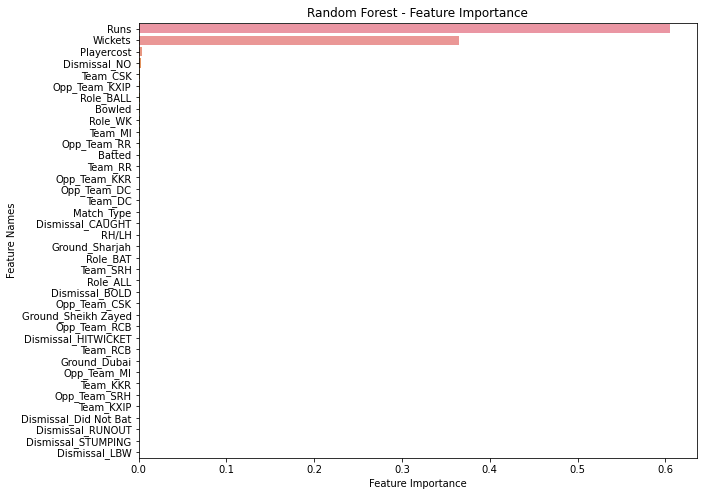

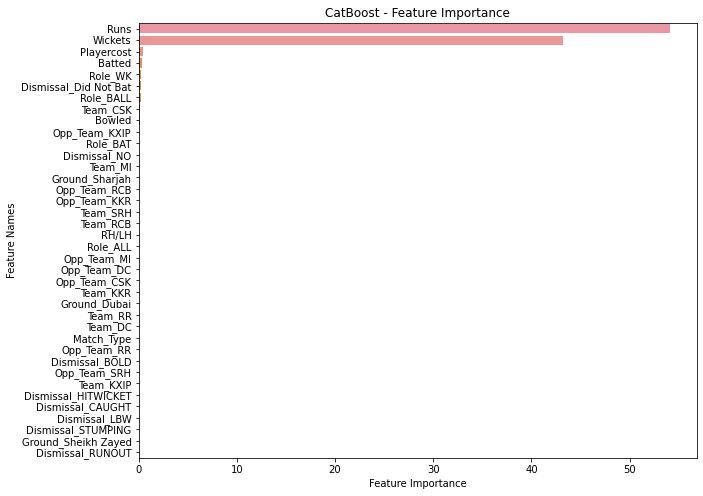

In [45]:

features = X.columns


def plot_feature_importance(importance, names, model_type):
    # Creating arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Creating a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    # Sorting the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # Defining size of bar plot
    plt.figure(figsize=(10,8))
    # Plotting Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    # Adding chart labels
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    
    # Saving the plot to the directory
    clean_model_name = model_type.replace(' ', '_')  # to create a safe filename
    plt.savefig(os.path.join(plots_directory, f"Feature_Importance_{clean_model_name}.png"))
    plt.show()

# Plotting feature importance
plot_feature_importance(rf_importances, features, 'Random Forest')
plot_feature_importance(catboost_importances, features, 'CatBoost')


In [46]:
## Linear Regression
from sklearn.linear_model import LinearRegression

# Instantiating Linear Regression model
lr_model = LinearRegression()

# Training the model on the combined dataset
lr_model.fit(X_combined, y_combined)

# Evaluating model on test set
lr_predictions = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)

print(f"Linear Regression RMSE on Test Set: {lr_rmse:.4f}")


Linear Regression RMSE on Test Set: 7.2191


### ENSEMBLE MODELS

### WEIGHTED AVERAGE

In [47]:
# Predicting on the test set using the individual models
rf_pred_test = best_rf.predict(X_test)
cb_pred_test = best_catboost.predict(X_test)
lr_pred_test = lr_model.predict(X_test)

# Weighted Average Ensemble on the test set
ensemble_pred_test = (rf_pred_test + cb_pred_test + lr_pred_test) / 3

# Evaluating the ensemble on the test set
ensemble_rmse_test = mean_squared_error(y_test, ensemble_pred_test, squared=False)
print("Weighted Average RMSE on Test Set:", ensemble_rmse_test)


Weighted Average RMSE on Test Set: 6.411465217502212


### STACKING

In [48]:
# Predictions on the combined training data for stacking
rf_train_pred = best_rf.predict(X_combined)
cb_train_pred = best_catboost.predict(X_combined)
lr_train_pred = lr_model.predict(X_combined)

# Stacking the predictions for the combined training data
stacked_train_predictions = np.column_stack((rf_train_pred, cb_train_pred, lr_train_pred))

# Training a meta-model on the stacked predictions
meta_model = LinearRegression()
meta_model.fit(stacked_train_predictions, y_combined)

# Stacking predictions on the test set
stacked_test_predictions = np.column_stack((rf_pred_test, cb_pred_test, lr_pred_test))
ensemble_pred_test = meta_model.predict(stacked_test_predictions)

ensemble_rmse_test = mean_squared_error(y_test, ensemble_pred_test, squared=False)
print("Stacked Ensemble RMSE on Test Set:", ensemble_rmse_test)


Stacked Ensemble RMSE on Test Set: 7.268464421388745


### EXPLORING MORE MODELS

In [49]:
!pip install xgboost 

In [50]:
import xgboost as xgb

# Initializing the XGBoost Regressor model with a specific objective function
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Training the XGBoost model on the combined dataset
xgb_model.fit(X_combined, y_combined)

# Predicting target values on the test set using the trained XGBoost model
xgb_test_predictions = xgb_model.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for predictions on the test set
xgb_test_rmse = mean_squared_error(y_test, xgb_test_predictions, squared=False)

# Displaying the computed RMSE value for the test dataset
print("XGBoost RMSE on Test Set:", xgb_test_rmse)


XGBoost RMSE on Test Set: 8.254752884729175


In [51]:
!pip install lightgbm 


In [52]:
import lightgbm as lgb

# Initializing the LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Training the LightGBM model on the combined dataset
lgb_model.fit(X_combined, y_combined)

# Predicting target values on the test set using the trained LightGBM model
lgb_test_predictions = lgb_model.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for predictions on the test set
lgb_test_rmse = mean_squared_error(y_test, lgb_test_predictions, squared=False)

# Displaying the computed RMSE value for the test dataset
print("LightGBM RMSE on Test Set:", lgb_test_rmse)


LightGBM RMSE on Test Set: 8.580355302890244


In [53]:
from sklearn.ensemble import VotingRegressor

# Models
reg1 = LinearRegression()
reg2 = RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=200)
reg3 = CatBoostRegressor(depth=4, iterations=200, learning_rate=0.05, verbose=0)

voting_model = VotingRegressor(estimators=[('lr', reg1), ('rf', reg2), ('cb', reg3)])

# Using combined data for training
voting_model.fit(X_combined, y_combined)

# Evaluating the model on the test set
voting_test_predictions = voting_model.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for predictions on the test dataset
voting_test_rmse = mean_squared_error(y_test, voting_test_predictions, squared=False)

# Displaying the computed RMSE value for the test dataset
print("Voting Ensemble(LR, RF, CB) RMSE on Test Set:", voting_test_rmse)


Voting Ensemble(LR, RF, CB) RMSE on Test Set: 6.441217418284367


In [54]:
from sklearn.ensemble import VotingRegressor

# Models
reg1 = RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=200)
reg2 = CatBoostRegressor(depth=4, iterations=200, learning_rate=0.05, verbose=0)

voting_model = VotingRegressor(estimators=[('rf', reg1), ('cb', reg2)])

# Using combined data for training
voting_model.fit(X_combined, y_combined)

# Evaluating the model on the test set
voting_test_predictions = voting_model.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for predictions on the test dataset
voting_test_rmse = mean_squared_error(y_test, voting_test_predictions, squared=False)

# Displaying the computed RMSE value for the test dataset
print("Voting Ensemble(RF & CB) RMSE on Test Set:", voting_test_rmse)


Voting Ensemble(RF & CB) RMSE on Test Set: 6.550555562571181


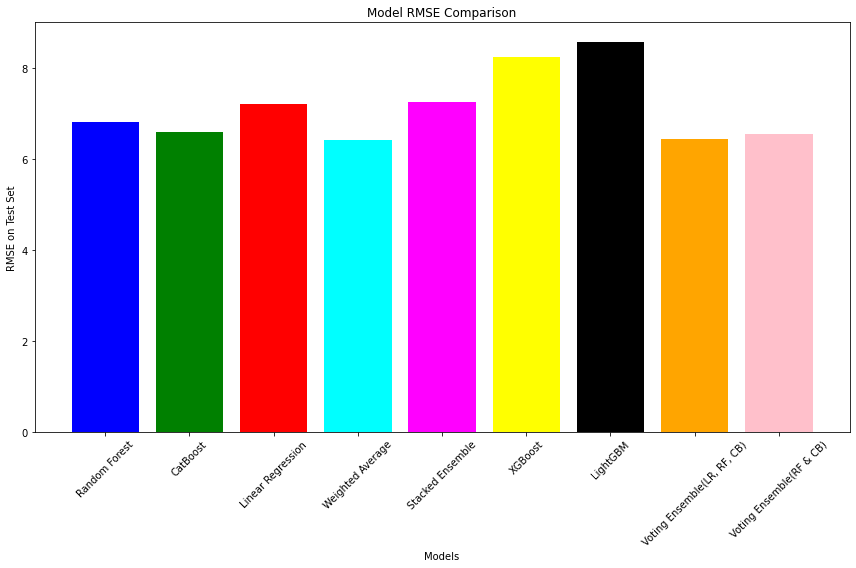

In [84]:
# Model names and corresponding RMSE values
models = ['Random Forest', 'CatBoost', 'Linear Regression', 'Weighted Average', 'Stacked Ensemble', 'XGBoost', 'LightGBM', 'Voting Ensemble(LR, RF, CB)', 'Voting Ensemble(RF & CB)']
rmse_values = [6.8139, 6.6041, 7.2191, 6.4114, 7.2684, 8.2547, 8.5803, 6.4412, 6.5505]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange','pink'])
plt.xlabel('Models')
plt.ylabel('RMSE on Test Set')
plt.title('Model RMSE Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plots_directory, "Model_RMSE_Comparison.png"))

# Displaying the plot
plt.show()


In [56]:
# Predicting Dream11 points
predicted_points = best_catboost.predict(X_test)


In [57]:
# Creating a DataFrame to compare predictions with actual values
comparison_df = pd.DataFrame({
    'Player': player_mapping.loc[X_test.index],
    'Actual Points': y_test,  # assuming y_test contains true labels for the test set
    'Predicted Points': predicted_points
})

print(comparison_df)


              Player  Actual Points  Predicted Points
678   Murugan Ashwin             56         55.659244
693     Rohit Sharma             46         46.228048
610    Andre Russell             43         50.138172
49       Shivam Dube             63         63.994919
1291    Jason Holder             35         42.450254
...              ...            ...               ...
1013          W Saha            115        108.292363
1003     Chris Gayle             83         74.093375
952     Chris Morris             29         33.327791
542       Jagadeesan             41         45.951625
170    Andre Russell             37         31.971064

[264 rows x 3 columns]


In [58]:
# Setting the display options
pd.set_option('display.max_rows', None)


comparison_df

,Player,Actual Points,Predicted Points
678,Murugan Ashwin,56,55.659244
693,Rohit Sharma,46,46.228048
610,Andre Russell,43,50.138172
49,Shivam Dube,63,63.994919
1291,Jason Holder,35,42.450254
486,Hetmeyer,84,64.814454
548,S Thakur,53,58.674802
940,Abdul Samad,12,14.922600
78,Watson,46,45.959163
506,Rahul Tripathi,3,11.960931


In [59]:
comparison_df['Difference'] = comparison_df['Predicted Points'] - comparison_df['Actual Points']

# Sorting by difference to see where the model had the largest discrepancies
sorted_comparison = comparison_df.sort_values(by='Difference', ascending=False)
print(sorted_comparison)


                  Player  Actual Points  Predicted Points  Difference
493               Nortje             29         55.784287   26.784287
155             Bairstow              5         16.650498   11.650498
772              S.Yadav              2         13.475165   11.475165
1174       Shreyas Gopal             48         59.018580   11.018580
759               Warner             56         66.076169   10.076169
1078            KL Rahul             57         66.983417    9.983417
572         Rohit Sharma              3         12.752507    9.752507
680       Mohammed Shami             48         57.371870    9.371870
506       Rahul Tripathi              3         11.960931    8.960931
210              De Kock             19         27.916056    8.916056
974            Pattinson             48         56.886355    8.886355
584       Shikhar Dhawan             89         97.789728    8.789728
275             KL Rahul             22         30.676657    8.676657
1194        Chris Mo

In [60]:

# Calculating RMSE
catboost_rmse = mean_squared_error(y_test, catboost_predictions, squared=False)
print(f"CatBoost RMSE on Test Set: {catboost_rmse:.4f}")

CatBoost RMSE on Test Set: 6.6041


In [61]:
pd.reset_option('display.max_rows') # again set to default


### OPTIMAL PLAYER SELECTION USING PULP OPTIMIZATION

In [62]:
original_df ## original dataframe 

,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal,Playercost
0,M1,MS Dhoni,CSK,MI,RH,Chasing,Sheikh Zayed,WK,0.0,NaN,20,NO,9.5
1,M1,Watson,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,4.0,NaN,17,LBW,9.5
2,M1,Rayudu,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,71.0,NaN,95,CAUGHT,9.0
3,M1,Du Plesis,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,58.0,NaN,100,NO,9.0
4,M1,Vijay,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,1.0,NaN,5,LBW,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,M16,Coulter Nile,MI,DC,RH,Defending,Dubai,BALL,NaN,2,68,NaN,8.5
1316,M16,J Yadav,MI,DC,RH,Defending,Dubai,ALL,NaN,1,29,NaN,7.5
1317,M16,Boult,MI,DC,LH,Defending,Dubai,BALL,NaN,,79,NaN,9.0
1318,M16,Bumrah,MI,DC,RH,Defending,Dubai,BALL,NaN,0,4,NaN,9.0


In [63]:
# Converting the model's predictions into a pandas Series, setting the index to match that of the test data
predicted_series = pd.Series(catboost_predictions, index=X_test.index, name="Predicted Points")

# Merging the predicted values with the original DataFrame based on the common index
original_df = original_df.join(predicted_series, on=original_df.index)



In [64]:
original_df.dropna(subset=["Predicted Points"], inplace=True) # Removing rows with NaN values in the "Predicted Points" column


In [65]:
original_df # checking after all modifications

,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal,Playercost,Predicted Points
23,M1,Shikhar Dhawan,DC,KXIP,LH,Defending,Dubai,BAT,0.0,NaN,2,RUNOUT,10.0,9.807536
29,M1,Ashwin,DC,KXIP,RH,Defending,Dubai,BALL,4.0,2,58,CAUGHT,9.0,61.090044
31,M1,Nortje,DC,KXIP,RH,Defending,Dubai,BALL,3.0,0,7,NO,8.0,6.986704
32,M1,Mohit Sharma,DC,KXIP,RH,Defending,Dubai,BALL,NaN,1,23,NaN,8.0,29.936866
43,M1,Ravi Bishnoi,KXIP,DC,RH,Chasing,Dubai,BALL,NaN,1,31,NaN,8.0,30.008808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,M16,De Kock,MI,DC,LH,Defending,Dubai,WK,20.0,NaN,45,CAUGHT,10.0,34.701780
1311,M16,Ishan Kishan,MI,DC,LH,Defending,Dubai,WK,33.0,NaN,42,NO,8.5,47.110192
1312,M16,Krunal Pandya,MI,DC,LH,Defending,Dubai,ALL,1.0,0,3,NO,8.0,7.632947
1314,M16,Kieron Pollard,MI,DC,RH,Defending,Dubai,ALL,9.0,0,15,BOLD,9.0,16.579355


In [66]:
optimized_df = original_df[['Player', 'Team', 'Role', 'Playercost', 'Predicted Points']].copy() # Creating a new DataFrame 'optimized_df' that consists of a subset of columns from the original DataFrame


In [67]:
optimized_df # checking the newly created dataframe

,Player,Team,Role,Playercost,Predicted Points
23,Shikhar Dhawan,DC,BAT,10.0,9.807536
29,Ashwin,DC,BALL,9.0,61.090044
31,Nortje,DC,BALL,8.0,6.986704
32,Mohit Sharma,DC,BALL,8.0,29.936866
43,Ravi Bishnoi,KXIP,BALL,8.0,30.008808
...,...,...,...,...,...
1309,De Kock,MI,WK,10.0,34.701780
1311,Ishan Kishan,MI,WK,8.5,47.110192
1312,Krunal Pandya,MI,ALL,8.0,7.632947
1314,Kieron Pollard,MI,ALL,9.0,16.579355


In [68]:
optimized_df.isnull().sum() # Checking for any null values in 'optimized_df'

Player              0
Team                0
Role                0
Playercost          0
Predicted Points    0
dtype: int64

In [69]:
optimized_df.duplicated().sum() # Checking for duplicate rows in 'optimized_df'

1

In [70]:
duplicates = optimized_df[optimized_df.duplicated(keep=False)]
print(duplicates) # Displaying any duplicated rows for examination


        Player Team  Role  Playercost  Predicted Points
425  Pattinson   MI  BALL         8.5         56.886355
974  Pattinson   MI  BALL         8.5         56.886355


In [71]:
optimized_df = optimized_df.drop_duplicates() # Removing duplicate rows from 'optimized_df'


In [72]:
optimized_df.duplicated().sum() # Confirming that duplicates have been removed

0

In [73]:
!pip install pulp 


In [74]:
import pulp # Importing the necessary libraries


In [75]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# Defining the model
model = LpProblem(name="fantasy-cricket-team", sense=LpMaximize)

# Creating a binary variable for each player that is 1 if the player is selected, 0 otherwise
player_vars = {row['Player']: LpVariable(name=row['Player'], cat='Binary') for _, row in optimized_df.iterrows()}
captain_vars = {row['Player']: LpVariable(name=f"Captain_{row['Player']}", cat='Binary') for _, row in optimized_df.iterrows()}
vice_captain_vars = {row['Player']: LpVariable(name=f"ViceCaptain_{row['Player']}", cat='Binary') for _, row in optimized_df.iterrows()}

# Objective Function: Maximizing the total predicted points including captain and vice-captain bonuses
objective_expression = []
for _, row in optimized_df.iterrows():
    player_name = row['Player']
    predicted_points = row['Predicted Points']
    objective_expression.append(player_vars[player_name] * predicted_points)
    objective_expression.append(captain_vars[player_name] * 2 * predicted_points)
    objective_expression.append(vice_captain_vars[player_name] * 1.5 * predicted_points)

model += lpSum(objective_expression)

# Constraints

# 1. Selecting 11 players
model += lpSum(player_vars.values()) == 11

# 2. Only one captain and one vice-captain
model += lpSum(captain_vars.values()) == 1
model += lpSum(vice_captain_vars.values()) == 1

# Ensuring only selected players can be captain or vice captain
for _, row in optimized_df.iterrows():
    player_name = row['Player']
    model += captain_vars[player_name] <= player_vars[player_name]
    model += vice_captain_vars[player_name] <= player_vars[player_name]

# Ensuring captain and vice captain are not the same
for _, row in optimized_df.iterrows():
    player_name = row['Player']
    model += captain_vars[player_name] + vice_captain_vars[player_name] <= 1

# 3. Credit Constraint
model += lpSum(player_vars[row['Player']] * row['Playercost'] for _, row in optimized_df.iterrows()) <= 100

# 4. Team Constraint: Maximum of 7 players can be from one team
for team in optimized_df['Team'].unique():
    model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Team'] == team].iterrows()) <= 7

# 5. Player Role Constraints
# Wicketkeepers
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'WK'].iterrows()) >= 1
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'WK'].iterrows()) <= 4

# Batsmen
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'BAT'].iterrows()) >= 3
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'BAT'].iterrows()) <= 6

# Bowlers
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'BALL'].iterrows()) >= 3
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'BALL'].iterrows()) <= 6

# All-rounders
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'ALL'].iterrows()) >= 1
model += lpSum(player_vars[row['Player']] for _, row in optimized_df[optimized_df['Role'] == 'ALL'].iterrows()) <= 4

# Solving the model
model.solve()

# Displaying selected players
selected_players = [player for player, var in player_vars.items() if var.value() == 1]
print("Selected Players:", selected_players)
# Displaying captain
captain = [player for player, var in captain_vars.items() if var.value() == 1][0]
print("Captain:", captain)
# Displaying vice captain
vice_captain = [player for player, var in vice_captain_vars.items() if var.value() == 1][0]
print("Vice Captain:", vice_captain)


Selected Players: ['Ravi Bishnoi', 'Vijay', 'Nicolas Pooran', 'Siddarth Kaul', 'Pattinson', 'Prabhsimran Singh', 'Murugan Ashwin', 'Sam Curran', 'Chris Gayle', 'W Saha', 'Rinku Singh']
Captain: W Saha
Vice Captain: Chris Gayle


In [76]:
print("Status:", pulp.LpStatus[model.status]) # Printing the status of the linear programming model


Status: Optimal


In [77]:
# Extracting predicted points of selected players
selected_points = {player: optimized_df.loc[optimized_df['Player'] == player, 'Predicted Points'].values[0] 
                   for player in selected_players}

# Displaying selected players with their predicted points
print("Selected Players:")
for player, points in selected_points.items():
    print(f"{player}: {points:.2f} points")

# Displaying captain and vice-captain with their associated bonus predicted points
captain_points = selected_points[captain] * 2  # double points for captain
vice_captain_points = selected_points[vice_captain] * 1.5  # 1.5 times points for vice-captain

print("\nCaptain:")
print(f"{captain}: {captain_points:.2f} points (includes bonus)")

print("\nVice Captain:")
print(f"{vice_captain}: {vice_captain_points:.2f} points (includes bonus)")

# Calculating the total predicted points for the entire team
total_points = sum(selected_points.values()) + captain_points + vice_captain_points - selected_points[captain] - selected_points[vice_captain]
print(f"\nTotal Predicted Points of Selected Team: {total_points:.2f} points")


Selected Players:
Ravi Bishnoi: 30.01 points
Vijay: 31.25 points
Nicolas Pooran: 62.77 points
Siddarth Kaul: 55.95 points
Pattinson: 56.89 points
Prabhsimran Singh: 17.93 points
Murugan Ashwin: 55.66 points
Sam Curran: 32.60 points
Chris Gayle: 74.09 points
W Saha: 108.29 points
Rinku Singh: 16.40 points

Captain:
W Saha: 216.58 points (includes bonus)

Vice Captain:
Chris Gayle: 111.14 points (includes bonus)

Total Predicted Points of Selected Team: 687.18 points


In [78]:
assert len(selected_players) == 11  # Ensuring that the total number of selected players is 11

In [79]:
total_cost = sum(optimized_df[optimized_df['Player'].isin(selected_players)]['Playercost']) # Calculating the total cost of the selected players
assert total_cost <= 100 # Ensuring that the total cost of selected players is less than or equal to 100


In [80]:
constraints = {
    "WK": (1, 4),
    "BAT": (3, 6),
    "ALL": (1, 4),
    "BALL": (3, 6)
} # Defining constraints for selecting players based on their roles

In [81]:
for role in optimized_df['Role'].unique(): # Looping through each unique player role and validate the number of players selected for that role
    players_in_role = len(optimized_df[(optimized_df['Player'].isin(selected_players)) & (optimized_df['Role'] == role)])
    
      # Fetching the constraints for the given player role
    min_value, max_value = constraints[role]
    # Checking if the number of selected players for the role is within the constraints
    assert min_value <= players_in_role <= max_value


In [82]:
for team in optimized_df['Team'].unique(): # Looping through each unique team and ensure that not more than 7 players are selected from a single team
    players_in_team = len(optimized_df[(optimized_df['Player'].isin(selected_players)) & (optimized_df['Team'] == team)])
    assert players_in_team <= 7


In [83]:
assert captain in selected_players # Ensuring that the selected captain and vice-captain are in the list of selected players
assert vice_captain in selected_players
assert captain != vice_captain  # Ensuring that the captain and vice-captain are not the same player

